In [1]:
# Cargamos las bibliotecas
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Leemos los dos archivos, saltandonos las filas necesarias
df1 = pd.read_csv("sargento_201117.csv", header=None, names=['N','Date','Press','Temp','WL'], skiprows=2, sep=',')
df2 = pd.read_csv("sargento-salinidad-201117.csv", header=None, names=['N','Date','CHR','Temp','SC','Sal'],
                  skiprows=3, sep=',')

#Eliminamos la última fila un archivo
df1=df1.drop(df1.index[len(df1)-1])

#Se crean los data frames
df1=pd.DataFrame(df1)
df2=pd.DataFrame(df2)

In [3]:
# Nuestros Datos
df1.head()

,N,Date,Press,Temp,WL
0,1,10/26/2017 13:00:00,105.612,24.448,-0.150
1,2,10/26/2017 13:15:00,105.513,24.351,-0.160
2,3,10/26/2017 13:30:00,105.433,24.351,-0.168
3,4,10/26/2017 13:45:00,105.385,24.351,-0.173
4,5,10/26/2017 14:00:00,105.321,24.351,-0.179


In [4]:
# Nuestros Datos
df2.head()

,N,Date,CHR,Temp,SC,Sal
0,2,10/26/2017 13:00:00,54525.5,24.91,54622.1,36.1588
1,3,10/26/2017 13:15:00,54525.5,24.82,54719.0,36.2311
2,4,10/26/2017 13:30:00,54525.5,24.76,54783.8,36.2794
3,5,10/26/2017 13:45:00,54525.5,24.75,54794.6,36.2875
4,6,10/26/2017 14:00:00,54525.5,24.73,54816.2,36.3036


In [5]:
# Tipo de datos
df1.dtypes

N          int64
Date      object
Press    float64
Temp     float64
WL       float64
dtype: object

In [6]:
# Tipo de datos
df2.dtypes

N         int64
Date     object
CHR     float64
Temp    float64
SC      float64
Sal     float64
dtype: object

In [7]:
# Convertir la cadena de caracteres 'Date' en variable temporal 'NDateTime'
df1['Ndt'] = pd.to_datetime(df1['Date'],format='%m/%d/%Y %H:%M:%S')
df1['month'] = df1['Ndt'].dt.month
df1.head()

,N,Date,Press,Temp,WL,Ndt,month
0,1,10/26/2017 13:00:00,105.612,24.448,-0.150,2017-10-26 13:00:00,10
1,2,10/26/2017 13:15:00,105.513,24.351,-0.160,2017-10-26 13:15:00,10
2,3,10/26/2017 13:30:00,105.433,24.351,-0.168,2017-10-26 13:30:00,10
3,4,10/26/2017 13:45:00,105.385,24.351,-0.173,2017-10-26 13:45:00,10
4,5,10/26/2017 14:00:00,105.321,24.351,-0.179,2017-10-26 14:00:00,10


In [8]:
# Convertir la cadena de caracteres 'Date' en variable temporal 'NDateTime'
df2['Ndt'] = pd.to_datetime(df2['Date'],format='%m/%d/%Y %H:%M:%S')
df2['month'] = df2['Ndt'].dt.month
df2.head()

,N,Date,CHR,Temp,SC,Sal,Ndt,month
0,2,10/26/2017 13:00:00,54525.5,24.91,54622.1,36.1588,2017-10-26 13:00:00,10
1,3,10/26/2017 13:15:00,54525.5,24.82,54719.0,36.2311,2017-10-26 13:15:00,10
2,4,10/26/2017 13:30:00,54525.5,24.76,54783.8,36.2794,2017-10-26 13:30:00,10
3,5,10/26/2017 13:45:00,54525.5,24.75,54794.6,36.2875,2017-10-26 13:45:00,10
4,6,10/26/2017 14:00:00,54525.5,24.73,54816.2,36.3036,2017-10-26 14:00:00,10


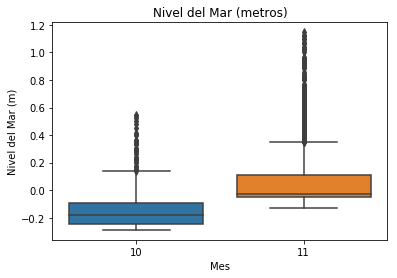

In [9]:
# Gráfica de Nivel de mar (metros)
ax = sns.boxplot(x="month", y="WL", data=df1)
plt.title('Nivel del Mar (metros)')
plt.ylabel('Nivel del Mar (m)')
plt.xlabel('Mes')
plt.show()

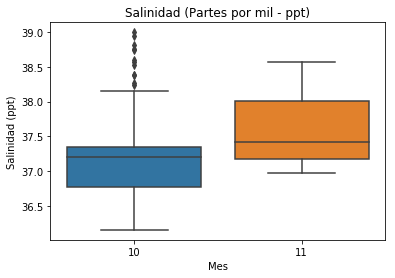

In [10]:
# Gráfica de Salinidad (Partes por mil - ppt)
ax = sns.boxplot(x="month", y="Sal", data=df2)
plt.title('Salinidad (Partes por mil - ppt)')
plt.ylabel('Salinidad (ppt)')
plt.xlabel('Mes')
plt.show()

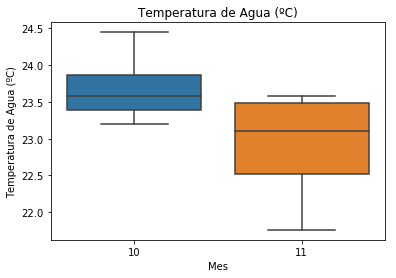

In [11]:
# Gráfica de Temperatura de Agua (ºC)
ax = sns.boxplot(x="month", y="Temp", data=df1)
plt.title('Temperatura de Agua (ºC)')
plt.ylabel('Temperatura de Agua (ºC)')
plt.xlabel('Mes')
plt.show()

In [12]:
# Descripción de datos
df1.describe()

,N,Press,Temp,WL,month
count,2394.000000,2394.000000,2394.000000,2394.000000,2394.000000
mean,1197.500000,107.430007,23.120883,0.030863,10.781119
std,691.232595,2.371844,0.563555,0.235974,0.413574
min,1.000000,104.229000,21.760000,-0.288000,10.000000
25%,599.250000,106.407000,22.525000,-0.071000,11.000000
50%,1197.500000,106.764000,23.388000,-0.035000,11.000000
75%,1795.750000,107.305000,23.484000,0.018750,11.000000
max,2394.000000,118.641000,24.448000,1.146000,11.000000


In [13]:
# Descripción de datos
df2.describe()

,N,CHR,Temp,SC,Sal,month
count,2394.000000,2394.000000,2394.000000,2394.000000,2394.000000,2394.000000
mean,1198.500000,54524.972807,23.316646,56386.831662,37.479737,10.781119
std,691.232595,11.876669,0.547033,619.501987,0.464974,0.413574
min,2.000000,54105.700000,21.490000,54622.100000,36.158800,10.000000
25%,600.250000,54525.500000,22.730000,55949.700000,37.151400,11.000000
50%,1198.500000,54525.500000,23.490000,56185.600000,37.328300,11.000000
75%,1796.750000,54525.500000,23.700000,57053.700000,37.980300,11.000000
max,2395.000000,54525.500000,24.910000,58398.700000,38.994200,11.000000


In [14]:
# Juntamos ambos archivos
pd.concat([df1, df2], axis=1, join_axes=[df2.index])

,N,Date,Press,Temp,WL,Ndt,month,N,Date,CHR,Temp,SC,Sal,Ndt,month
0,1,10/26/2017 13:00:00,105.612,24.448,-0.150,2017-10-26 13:00:00,10,2,10/26/2017 13:00:00,54525.5,24.91,54622.1,36.1588,2017-10-26 13:00:00,10
1,2,10/26/2017 13:15:00,105.513,24.351,-0.160,2017-10-26 13:15:00,10,3,10/26/2017 13:15:00,54525.5,24.82,54719.0,36.2311,2017-10-26 13:15:00,10
2,3,10/26/2017 13:30:00,105.433,24.351,-0.168,2017-10-26 13:30:00,10,4,10/26/2017 13:30:00,54525.5,24.76,54783.8,36.2794,2017-10-26 13:30:00,10
3,4,10/26/2017 13:45:00,105.385,24.351,-0.173,2017-10-26 13:45:00,10,5,10/26/2017 13:45:00,54525.5,24.75,54794.6,36.2875,2017-10-26 13:45:00,10
4,5,10/26/2017 14:00:00,105.321,24.351,-0.179,2017-10-26 14:00:00,10,6,10/26/2017 14:00:00,54525.5,24.73,54816.2,36.3036,2017-10-26 14:00:00,10
5,6,10/26/2017 14:15:00,105.273,24.351,-0.184,2017-10-26 14:15:00,10,7,10/26/2017 14:15:00,54525.5,24.72,54827.0,36.3117,2017-10-26 14:15:00,10
6,7,10/26/2017 14:30:00,105.225,24.351,-0.189,2017-10-26 14:30:00,10,8,10/26/2017 14:30:00,54525.5,24.70,54848.7,36.3279,2017-10-26 14:30:00,10
7,8,10/26/2017 14:45:00,105.177,24.351,-0.193,2017-10-26 14:45:00,10,9,10/26/2017 14:45:00,54525.5,24.69,54859.5,36.3360,2017-10-26 14:45:00,10
8,9,10/26/2017 15:00:00,105.145,24.351,-0.196,2017-10-26 15:00:00,10,10,10/26/2017 15:00:00,54525.5,24.67,54881.2,36.3521,2017-10-26 15:00:00,10
9,10,10/26/2017 15:15:00,105.113,24.351,-0.200,2017-10-26 15:15:00,10,11,10/26/2017 15:15:00,54525.5,24.67,54881.2,36.3521,2017-10-26 15:15:00,10


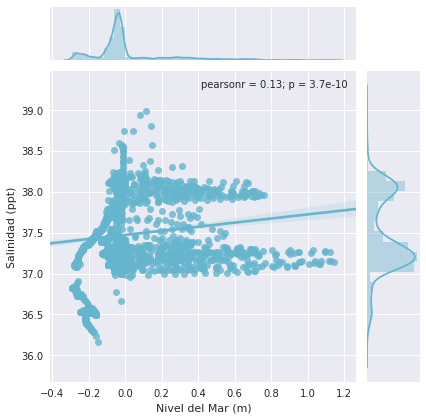

In [15]:
# Gráfica de Nivel de mar-Salinidad
sns.set(style="darkgrid", color_codes=True)
df3=pd.concat([df1, df2], axis=1, join_axes=[df2.index])
g = sns.jointplot("WL", "Sal", data=df3,kind="reg", color="c")
#plt.title('Nivel de mar-Salinidad')
plt.ylabel('Salinidad (ppt)')
plt.xlabel('Nivel del Mar (m)')
plt.show(g)

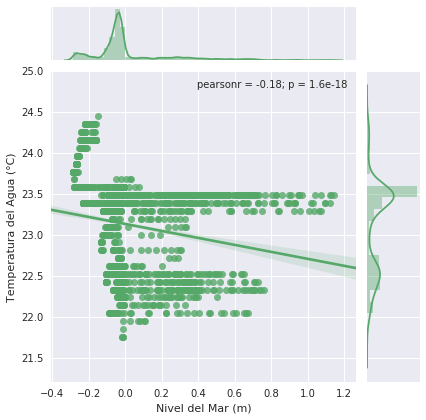

In [16]:
# Gráfica de Nivel de mar-Temperatura del agua
sns.set(style="darkgrid", color_codes=True)
g = sns.jointplot("WL", "Temp", data=df1, kind="reg", color="g")
#plt.title('Nivel de mar-Temperatura del Agua')
plt.ylabel('Temperatura del Agua (°C)')
plt.xlabel('Nivel del Mar (m)')
plt.show(g)

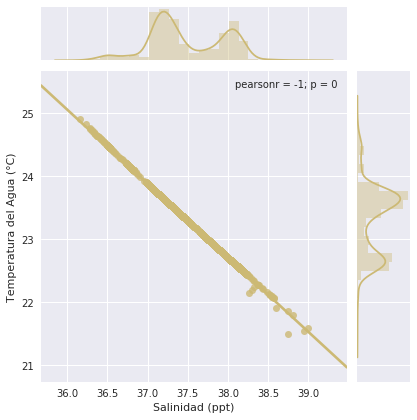

In [17]:
# Gráfica de Salinidad-Temperatura del agua
sns.set(style="darkgrid", color_codes=True)
g = sns.jointplot("Sal", "Temp", data=df2, kind="reg", color="y")
#plt.title('Salinidad-Temperatura del agua')
plt.ylabel('Temperatura del Agua (°C)')
plt.xlabel('Salinidad (ppt)')
plt.show(g)

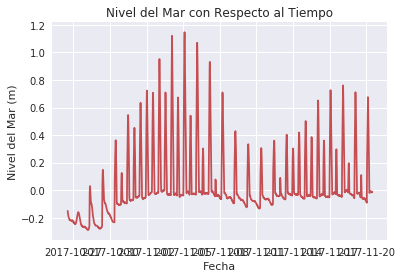

In [18]:
# Gráfica de Nivel del mar como función del tiempo
WL = df1['WL']
Date = df1['Ndt']
plt.plot_date(x=Date, y=WL, fmt='r-')
plt.title('Nivel del Mar con Respecto al Tiempo')
plt.ylabel('Nivel del Mar (m)')
plt.xlabel('Fecha')
plt.grid(True)
plt.show()

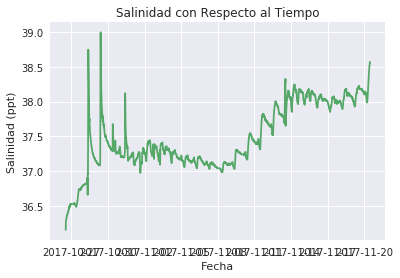

In [19]:
# Gráfica de Salinidad como función del tiempo
Sal = df2['Sal']
Date = df2['Ndt']
plt.plot_date(x=Date, y=Sal, fmt='g-')
plt.title('Salinidad con Respecto al Tiempo')
plt.ylabel('Salinidad (ppt)')
plt.xlabel('Fecha')
plt.grid(True)
plt.show()

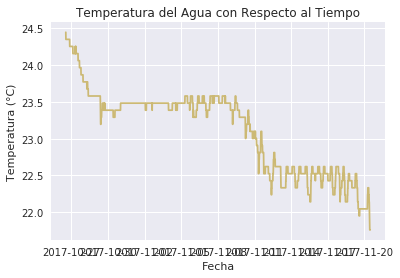

In [20]:
# Gráfica de Temperatura del Agua como función del tiempo
Temp = df1['Temp']
Date = df1['Ndt']
plt.plot_date(x=Date, y=Temp, fmt='y-')
plt.title('Temperatura del Agua con Respecto al Tiempo')
plt.ylabel('Temperatura (°C)')
plt.xlabel('Fecha')
plt.grid(True)
plt.show()

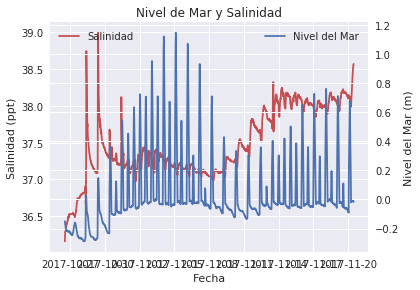

In [21]:
# Gráfica de Nivel de mar y Salinidad
fig, ax1 = plt.subplots()
Fecha=df1['Ndt']
sal=df2.Sal
WL=df1.WL
ax1.plot(Fecha,sal,'r-', label='Salinidad'); plt.legend(loc='upper left')
ax1.set_xlabel('Fecha')
ax1.set_ylabel('Salinidad (ppt)')
ax2 = ax1.twinx()
ax2.plot(Fecha, WL , 'b-', label='Nivel del Mar'); plt.legend(loc='best')
ax2.set_ylabel('Nivel del Mar (m)')
fig.tight_layout()
plt.title('Nivel de Mar y Salinidad')
plt.show()

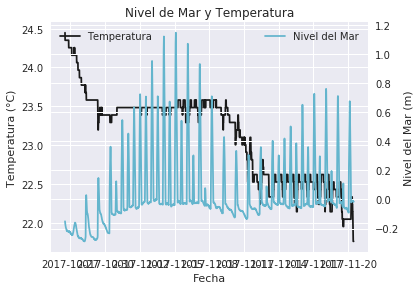

In [22]:
# Gráfica de Nivel de mar y Temperatura
fig, ax1 = plt.subplots()
Fecha=df1['Ndt']
Temp=df1.Temp
WL=df1.WL
ax1.plot(Fecha,Temp,'k-', label='Temperatura'); plt.legend(loc='upper left')
ax1.set_xlabel('Fecha')
ax1.set_ylabel('Temperatura (°C)')
ax2 = ax1.twinx()
ax2.plot(Fecha, WL , 'c-', label='Nivel del Mar'); plt.legend(loc='best')
ax2.set_ylabel('Nivel del Mar (m)')
fig.tight_layout()
plt.title('Nivel de Mar y Temperatura')
plt.show()

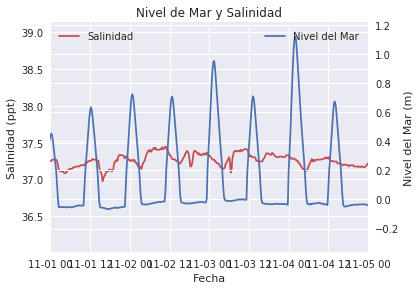

In [23]:
fig, ax1 = plt.subplots()
Fecha=df1['Ndt']
sal=df2.Sal
WL=df1.WL
ax1.plot(Fecha,sal,'r-', label='Salinidad'); plt.legend(loc='upper left')
ax1.set_xlabel('Fecha')
ax1.set_ylabel('Salinidad (ppt)')
ax2 = ax1.twinx()
ax2.plot(Fecha, WL , 'b-', label='Nivel del Mar'); plt.legend(loc='upper right')
ax2.set_ylabel('Nivel del Mar (m)')
fig.tight_layout()
plt.xlim(("2017-11-1 00:00:00","2017-11-5 00:00:00"))
plt.title('Nivel de Mar y Salinidad')
plt.show()

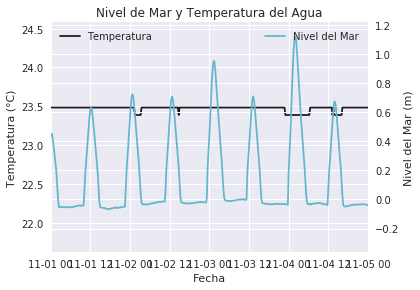

In [24]:
# Gráfica de Nivel de Mar y Temperatura del agua
fig, ax1 = plt.subplots()
Fecha=df1['Ndt']
Temp=df1.Temp
WL=df1.WL
ax1.plot(Fecha,Temp,'k-', label='Temperatura'); plt.legend(loc='upper left')
ax1.set_xlabel('Fecha')
ax1.set_ylabel('Temperatura (°C)')
ax2 = ax1.twinx()
ax2.plot(Fecha, WL , 'c-', label='Nivel del Mar'); plt.legend(loc='upper right')
ax2.set_ylabel('Nivel del Mar (m)')
fig.tight_layout()
plt.xlim(("2017-11-1 00:00:00","2017-11-5 00:00:00"))
plt.title('Nivel de Mar y Temperatura del Agua')
plt.show()